# Supervised machine Learning - Classification

## Splitting the initial dataset

As mentioned in the introduction, supervised machine learning is the process of finding a future result, using a model created by an algorithm from known results.

Now it is time to apply the machine learning algorithms in order to make a prediction. But what type of prediction could be applied when the results are already known? In the specific dataset () there are distinctive results.

It is time to make an agreement. In order to continue, we should divide our dataset into two groups. The first one, the larger (usually 70%-80% of the initial dataset) should be our **training set**. The dataset that we are going to use the algorithm with the known results in order to create a model. The rest of the initial dataset could be used as a **test set,** the set to apply the model and test it, checking and counting the agreement of predicted results with the observed ones, the **accuracy** of the model.

In [1]:
import pandas as pd
df = pd.read_csv('sonar.all-data.csv',header=None)
#all rows all columns but last
sonar = df.iloc[:, :-1]
#all rows, only the last column
sonar_class = df.iloc[:, -1]

In [2]:
sonar

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
sonar_class

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [4]:
from sklearn.model_selection import train_test_split
#test_size is the percentage of the test size to the complete dataset
# random_state is the seed. A specific pseudorandom number to split the data set
# in order to produce same splitting every time we run the script.
sonar_train, sonar_test, sonar_class_train, sonar_class_test = train_test_split(sonar, sonar_class, test_size = 0.25, random_state = 42)

In [5]:
sonar_train

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
29,0.0189,0.0308,0.0197,0.0622,0.0080,0.0789,0.1440,0.1451,0.1789,0.2522,...,0.0091,0.0038,0.0096,0.0142,0.0190,0.0140,0.0099,0.0092,0.0052,0.0075
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0153,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063
55,0.0201,0.0116,0.0123,0.0245,0.0547,0.0208,0.0891,0.0836,0.1335,0.1199,...,0.0032,0.0076,0.0045,0.0056,0.0075,0.0037,0.0045,0.0029,0.0008,0.0018
93,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,...,0.0121,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056
181,0.0423,0.0321,0.0709,0.0108,0.1070,0.0973,0.0961,0.1323,0.2462,0.2696,...,0.0367,0.0176,0.0035,0.0093,0.0121,0.0075,0.0056,0.0021,0.0043,0.0017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0331,0.0423,0.0474,0.0818,0.0835,0.0756,0.0374,0.0961,0.0548,0.0193,...,0.0133,0.0078,0.0174,0.0176,0.0038,0.0129,0.0066,0.0044,0.0134,0.0092
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062
92,0.0260,0.0192,0.0254,0.0061,0.0352,0.0701,0.1263,0.1080,0.1523,0.1630,...,0.0132,0.0118,0.0120,0.0051,0.0070,0.0015,0.0035,0.0008,0.0044,0.0077
179,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0118,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087


In [6]:
sonar_test

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
161,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0271,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021
15,0.0298,0.0615,0.0650,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459,0.0852,...,0.0154,0.0031,0.0153,0.0071,0.0212,0.0076,0.0152,0.0049,0.0200,0.0073
73,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,...,0.0024,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048
96,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085
166,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0181,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0257,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131
135,0.0094,0.0611,0.1136,0.1203,0.0403,0.1227,0.2495,0.4566,0.6587,0.5079,...,0.0480,0.0234,0.0175,0.0352,0.0158,0.0326,0.0201,0.0168,0.0245,0.0154
18,0.0270,0.0092,0.0145,0.0278,0.0412,0.0757,0.1026,0.1138,0.0794,0.1520,...,0.0045,0.0084,0.0010,0.0018,0.0068,0.0039,0.0120,0.0132,0.0070,0.0088
148,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068


In [7]:
# the train set responses of the dataset
sonar_class_train

29     R
19     R
55     R
93     R
181    M
      ..
106    M
14     R
92     R
179    M
102    M
Name: 60, Length: 156, dtype: object

In [8]:
#the test set responses of the dataset
sonar_class_test

161    M
15     R
73     R
96     R
166    M
9      R
100    M
135    M
18     R
148    M
171    M
30     R
155    M
180    M
125    M
197    M
164    M
190    M
84     R
75     R
124    M
170    M
104    M
101    M
69     R
25     R
95     R
16     R
141    M
185    M
154    M
68     R
66     R
120    M
147    M
98     M
138    M
167    M
45     R
113    M
65     R
178    M
86     R
203    M
67     R
82     R
205    M
194    M
38     R
24     R
60     R
195    M
Name: 60, dtype: object

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
#name StandardScaler()
scaler = StandardScaler()
#call it for the data (the result is array)
sonar_train_scaled = scaler.fit_transform(sonar_train)
sonar_test_scaled =scaler.transform(sonar_test)

# SVM classification algorithm 

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(sonar_train_scaled, sonar_class_train)

SVC(kernel='linear', probability=True, random_state=0)

## The prediction of the type M or F

In [11]:
sonar_test_pred = classifier.predict(sonar_test_scaled)

In [12]:
sonar_test_pred

array(['M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'R',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'R',
       'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'M'],
      dtype=object)

## The test set responses

In [13]:
sonar_class_test

161    M
15     R
73     R
96     R
166    M
9      R
100    M
135    M
18     R
148    M
171    M
30     R
155    M
180    M
125    M
197    M
164    M
190    M
84     R
75     R
124    M
170    M
104    M
101    M
69     R
25     R
95     R
16     R
141    M
185    M
154    M
68     R
66     R
120    M
147    M
98     M
138    M
167    M
45     R
113    M
65     R
178    M
86     R
203    M
67     R
82     R
205    M
194    M
38     R
24     R
60     R
195    M
Name: 60, dtype: object

In [14]:
#Calculating the confusion matrix and the accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(sonar_class_test, sonar_test_pred)
print(cm)
accuracy_score(sonar_class_test, sonar_test_pred)

[[23  7]
 [ 2 20]]


0.8269230769230769

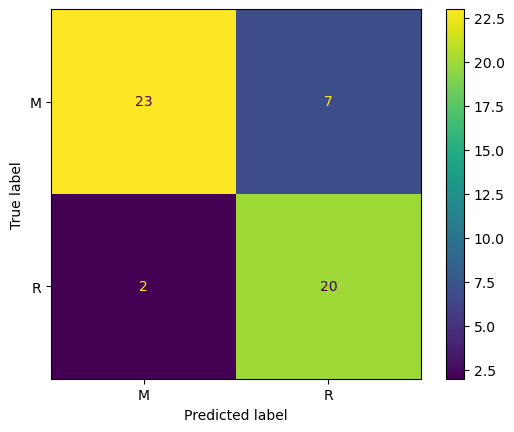

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(sonar_class_test, sonar_test_pred))

              precision    recall  f1-score   support

           M       0.92      0.77      0.84        30
           R       0.74      0.91      0.82        22

    accuracy                           0.83        52
   macro avg       0.83      0.84      0.83        52
weighted avg       0.84      0.83      0.83        52

